In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url)

print(df.shape)
df.head()

(3650, 2)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


# Lag Features

In [3]:
df['t-1'] = df['Temp'].shift(1)
df['t+1'] = df['Temp'].shift(-1)
df.head()

,Date,Temp,t-1,t+1
0,1981-01-01,20.7,NaN,17.9
1,1981-01-02,17.9,20.7,18.8
2,1981-01-03,18.8,17.9,14.6
3,1981-01-04,14.6,18.8,15.8
4,1981-01-05,15.8,14.6,15.8


There is more than one way of determining the lag at which the correlation is significant. For instance, we can use the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots.

- ACF: The ACF plot is a measure of the correlation between the time series and the lagged version of itself
- PACF: The PACF plot is a measure of the correlation between the time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons

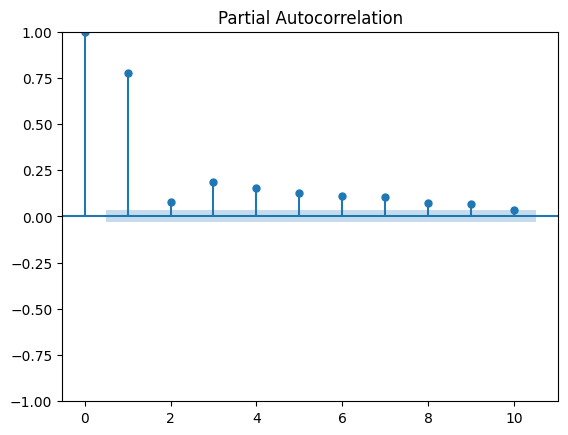

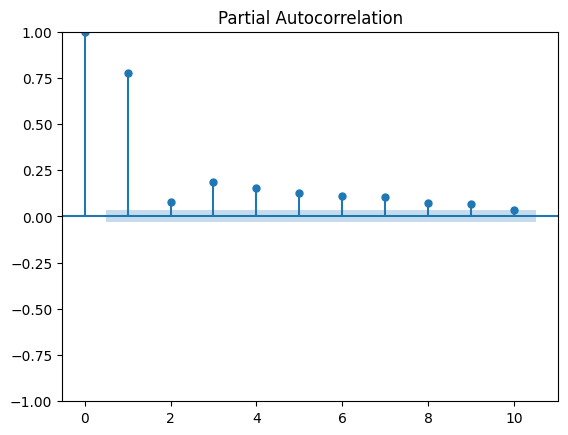

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['Temp'], lags=10, method='ywm')

# Rolling Window Statistics

- The first NaN was created by the shift of the series.
- The second because NaN cannot be used to calculate a mean value.
- The third row shows the expected value of 19.30 (the mean of 20.7 and 17.9) used to predict the 3rd value in the series of 18.8.

In [6]:
width = 2
df['mean(t-2, t-1)'] = df['Temp'].shift(width - 1).rolling(window=width).mean()
df.head()

,Date,Temp,t-1,t+1,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,"mean(t-2, t-1)"
0,1981-01-01,20.7,NaN,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1981-01-02,17.9,20.7,18.8,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1981-01-03,18.8,17.9,14.6,17.9,20.7,NaN,NaN,NaN,NaN,NaN,19.30
3,1981-01-04,14.6,18.8,15.8,18.8,17.9,20.7,NaN,NaN,NaN,NaN,18.35
4,1981-01-05,15.8,14.6,15.8,14.6,18.8,17.9,20.7,NaN,NaN,NaN,16.70


In [7]:
width = 2
window = df['Temp'].shift(width - 1).rolling(window=width)
dataframe = pd.concat([window.min(), window.mean(), window.max(), df['Temp']], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't']
print(dataframe.head(5))

    min   mean   max     t
0   NaN    NaN   NaN  20.7
1   NaN    NaN   NaN  17.9
2  17.9  19.30  20.7  18.8
3  17.9  18.35  18.8  14.6
4  14.6  16.70  18.8  15.8


# Expanding Window Statistics



In [8]:
window = df['Temp'].expanding()
dataframe = pd.concat([window.min(), window.mean(), window.max(), df['Temp'].shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8
